**Project 4 Notebook 4**

In which I take the document-term matrix from my tf-idf in Notebook 4, and do topic modeling.

In [1]:
import pandas as pd
import numpy as np
import re
from pprint import pprint
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD ##for LSA
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
#warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
#Perform steps from beginning in the previous notebook to get the document-term matrix.
katniss_2=pd.read_csv('Project-4-data/katniss2-restart-single-lower-nostop-stem.csv')

In [4]:
katniss_2.head(1)

,Unnamed: 0,Unnamed: 0.1,web-scraper-order,web-scraper-start-url,story_link,story_link-href,story_title,author_id,author_id-href,story_info,story_text_lower,story_text_tokenize,story_text_without_stopwords,story_text_stemmed
0,0,0,1613673749-43454,https://www.fanfiction.net/book/Hunger-Games/?...,Spring Break - Everlark Style,https://www.fanfiction.net/s/11858172/1/Spring...,Spring Break - Everlark Style,xerxia31,https://www.fanfiction.net/u/5705988/xerxia31,"Rated: Fiction T - English - Katniss E., Prim ...",for the tumblr everlark fic exchange spring e...,"['for', 'the', 'tumblr', 'everlark', 'fic', 'e...","['tumblr', 'everlark', 'fic', 'exchange', 'spr...","['tumblr', 'everlark', 'fic', 'exchang', 'spri..."


In [5]:
katniss_2['story_text_stemmed']=katniss_2['story_text_stemmed'].astype(str)
katniss_2.head(1)

,Unnamed: 0,Unnamed: 0.1,web-scraper-order,web-scraper-start-url,story_link,story_link-href,story_title,author_id,author_id-href,story_info,story_text_lower,story_text_tokenize,story_text_without_stopwords,story_text_stemmed
0,0,0,1613673749-43454,https://www.fanfiction.net/book/Hunger-Games/?...,Spring Break - Everlark Style,https://www.fanfiction.net/s/11858172/1/Spring...,Spring Break - Everlark Style,xerxia31,https://www.fanfiction.net/u/5705988/xerxia31,"Rated: Fiction T - English - Katniss E., Prim ...",for the tumblr everlark fic exchange spring e...,"['for', 'the', 'tumblr', 'everlark', 'fic', 'e...","['tumblr', 'everlark', 'fic', 'exchange', 'spr...","['tumblr', 'everlark', 'fic', 'exchang', 'spri..."


In [6]:
#Do the tf-idf vectorization to re-create the document-term matrix
corpus=katniss_2['story_text_stemmed']
cv_tfidf = TfidfVectorizer(decode_error='ignore', strip_accents='unicode', min_df=0.005)
X_tfidf = cv_tfidf.fit_transform(corpus).toarray() 
katniss_doc_term=pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())
katniss_doc_term.head(10)

,ab,aback,abandon,abdom,abernathy,abl,ablaz,abnorm,aboard,about,...,young,youngest,youth,youtub,yup,zero,zip,zomby,zon,zoom
0,0.026893,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.010347,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.021816,0.024642,0.0,0.0,0.0,0.000000,...,0.039659,0.0,0.000000,0.000000,0.033179,0.00000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.009873,0.0,0.0,0.0,0.000000,...,0.021186,0.0,0.014543,0.000000,0.000000,0.01248,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.016120,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.012157,0.0,0.0,0.0,0.000000,...,0.013044,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.059182,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.000000,0.009882,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.014674,0.016575,0.0,0.0,0.0,0.000000,...,0.008892,0.0,0.000000,0.023868,0.000000,0.00000,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0


In [12]:
#LSA
#Try Latent Semantic Analysis (LSA) topic modeling. Refer to Topic_Modeling_LSA_NMF notebook from class.
#LSA is just another name for Singular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
#Need to specify the number of topics; I'll start with 5 and tune.
lsa = TruncatedSVD(10)
katniss_doc_topic = lsa.fit_transform(X_tfidf)
lsa.explained_variance_ratio_

array([0.02059799, 0.02005612, 0.01711292, 0.01504799, 0.01386468,
       0.01215539, 0.0114711 , 0.01041193, 0.00960483, 0.00873615])

In [13]:
#LSA
#from class notebook. change name of vectorizer, round to 4 decimal places. Make for 5 components (topics).
katniss_topic_word = pd.DataFrame(lsa.components_.round(4),
             index = ["component_1","component_2", "component_3", "component_4", "component_5", 
                      "component_6", "component_7", "component_8", "component_9", "component_10"],
             columns = cv_tfidf.get_feature_names())
katniss_topic_word

,ab,aback,abandon,abdom,abernathy,abl,ablaz,abnorm,aboard,about,...,young,youngest,youth,youtub,yup,zero,zip,zomby,zon,zoom
component_1,0.0009,0.0014,0.0052,0.0016,0.0086,0.0235,0.0005,0.0005,0.0005,0.0012,...,0.0211,0.0039,0.0010,0.0011,0.0013,0.0014,0.0017,0.0012,0.0020,0.0008
component_2,0.0019,0.0002,-0.0055,-0.0007,0.0003,-0.0191,-0.0012,0.0001,-0.0002,0.0001,...,-0.0152,-0.0074,-0.0010,-0.0001,0.0027,0.0017,0.0008,0.0031,0.0005,-0.0006
component_3,0.0000,-0.0006,0.0021,-0.0012,0.0145,0.0036,0.0015,-0.0004,0.0006,-0.0002,...,0.0195,0.0060,-0.0002,0.0006,-0.0005,0.0015,-0.0010,0.0037,-0.0001,0.0005
component_4,-0.0006,0.0025,-0.0016,-0.0011,0.0016,-0.0140,0.0002,-0.0006,-0.0004,-0.0010,...,0.0092,0.0057,0.0000,-0.0011,-0.0011,-0.0003,0.0003,-0.0004,0.0013,-0.0000
component_5,-0.0017,0.0001,-0.0001,-0.0011,0.0116,-0.0020,0.0009,-0.0005,0.0001,0.0007,...,0.0181,0.0076,0.0000,-0.0010,-0.0030,-0.0002,-0.0014,-0.0064,-0.0038,0.0003
component_6,0.0013,-0.0012,-0.0016,0.0027,-0.0097,-0.0027,0.0013,-0.0001,-0.0007,-0.0034,...,0.0200,0.0040,0.0014,0.0017,0.0003,0.0016,0.0029,-0.0055,0.0002,0.0004
component_7,0.0014,0.0007,-0.0033,-0.0014,0.0388,-0.0180,-0.0024,0.0010,-0.0001,0.0032,...,0.0077,0.0050,-0.0016,0.0030,0.0009,0.0005,0.0015,-0.0022,0.0041,0.0000
component_8,0.0005,-0.0002,-0.0028,-0.0017,-0.0043,-0.0143,-0.0015,0.0018,-0.0003,-0.0016,...,-0.0035,0.0069,-0.0029,-0.0022,0.0028,0.0021,-0.0004,0.0055,-0.0008,0.0002
component_9,0.0004,0.0019,-0.0071,-0.0002,-0.0011,-0.0033,-0.0010,-0.0015,-0.0004,0.0021,...,-0.0398,-0.0163,0.0010,0.0022,-0.0004,-0.0027,0.0042,-0.0007,-0.0014,0.0015
component_10,0.0015,-0.0003,-0.0009,-0.0016,0.0246,0.0094,-0.0005,0.0014,0.0014,0.0022,...,0.0228,0.0062,0.0020,0.0022,0.0019,0.0043,-0.0007,-0.0060,0.0034,-0.0003


In [9]:
#LSA
#From notebook
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [14]:
#LSA
display_topics(lsa, cv_tfidf.get_feature_names(), 10)


Topic  0
peet, katniss, look, know, lik, say, back, on, ey, ev

Topic  1
katniss, peet, johann, said, madg, gal, finnick, prim, jo, christmas

Topic  2
johann, katniss, gal, district, cato, tribut, clov, prim, gam, said

Topic  3
gal, madg, prim, catnip, moth, fath, katniss, rory, hunt, hawthorn

Topic  4
katniss, haymitch, effy, peet, district, gam, tribut, capitol, would, vict

Topic  5
cato, clov, katniss, rue, girl, ey, glim, marvel, prim, school

Topic  6
effy, haymitch, say, madg, get, look, ask, dad, school, door

Topic  7
peet, cato, finnick, clov, say, anny, district, rue, kil, gam

Topic  8
cato, haymitch, clov, gal, effy, finnick, rue, knif, katniss, back

Topic  9
finnick, madg, anny, said, would, knew, could, felt, friend, mad


In [ ]:
#NMF 
#try NMF topic modeling

In [20]:
#NMF 
nmf_model = NMF(10)
katniss_NMF_doc_topic = nmf_model.fit_transform(X_tfidf)

/Users/amysillman/.conda/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [21]:
#NMF 
katniss_NMF_topic_word = pd.DataFrame(nmf_model.components_.round(4),
             index = ["component_1","component_2", "component_3", "component_4", "component_5", 
                      "component_6", "component_7", "component_8", "component_9", "component_10"],
             columns = cv_tfidf.get_feature_names())
katniss_NMF_topic_word

,ab,aback,abandon,abdom,abernathy,abl,ablaz,abnorm,aboard,about,...,young,youngest,youth,youtub,yup,zero,zip,zomby,zon,zoom
component_1,0.0008,0.0019,0.0253,0.0125,0.0000,0.1417,0.0022,0.0000,0.0013,0.0024,...,0.0219,0.0000,0.0095,0.0036,0.0000,0.0000,0.0080,0.0000,0.0047,0.0027
component_2,0.0018,0.0004,0.0039,0.0025,0.0109,0.0144,0.0007,0.0000,0.0007,0.0000,...,0.0502,0.0000,0.0011,0.0025,0.0000,0.0054,0.0046,0.0000,0.0000,0.0000
component_3,0.0057,0.0000,0.0035,0.0000,0.0066,0.0211,0.0000,0.0012,0.0018,0.0008,...,0.0000,0.0000,0.0000,0.0005,0.0060,0.0016,0.0000,0.0234,0.0047,0.0007
component_4,0.0000,0.0078,0.0000,0.0000,0.0000,0.0006,0.0000,0.0000,0.0002,0.0013,...,0.0000,0.0000,0.0012,0.0000,0.0000,0.0000,0.0008,0.0133,0.0040,0.0012
component_5,0.0000,0.0013,0.0302,0.0000,0.0206,0.0983,0.0067,0.0007,0.0030,0.0000,...,0.1612,0.0526,0.0017,0.0000,0.0000,0.0040,0.0000,0.0000,0.0000,0.0024
component_6,0.0000,0.0052,0.0000,0.0000,0.1195,0.0169,0.0000,0.0000,0.0012,0.0210,...,0.0000,0.0000,0.0008,0.0066,0.0000,0.0000,0.0010,0.0000,0.0012,0.0024
component_7,0.0045,0.0030,0.0084,0.0040,0.0430,0.0201,0.0000,0.0036,0.0003,0.0028,...,0.0622,0.0149,0.0000,0.0052,0.0067,0.0053,0.0038,0.0000,0.0138,0.0015
component_8,0.0030,0.0046,0.0000,0.0005,0.0000,0.0125,0.0000,0.0023,0.0005,0.0001,...,0.0000,0.0000,0.0000,0.0000,0.0057,0.0008,0.0017,0.0000,0.0000,0.0008
component_9,0.0014,0.0013,0.0000,0.0015,0.0000,0.0085,0.0000,0.0000,0.0000,0.0000,...,0.0092,0.0020,0.0018,0.0014,0.0001,0.0000,0.0076,0.0017,0.0000,0.0044
component_10,0.0000,0.0000,0.0019,0.0000,0.0000,0.0155,0.0000,0.0022,0.0005,0.0024,...,0.0000,0.0000,0.0000,0.0000,0.0090,0.0086,0.0000,0.0103,0.0000,0.0000


In [22]:
#NMF 
display_topics(nmf_model, cv_tfidf.get_feature_names(), 10)


Topic  0
ey, feel, back, hand, lik, know, fac, ev, tim, look

Topic  1
katniss, prim, said, could, ey, look, felt, sist, would, hand

Topic  2
johann, said, mason, brainless, jo, katniss, fuck, ax, anny, get

Topic  3
gal, madg, catnip, said, hawthorn, know, hunt, rory, back, prim

Topic  4
district, gam, would, capitol, on, year, tribut, ev, moth, reap

Topic  5
haymitch, effy, sweetheart, say, know, look, back, said, train, capitol

Topic  6
say, look, get, know, ask, prim, lik, madg, us, school

Topic  7
peet, lov, kiss, smil, would, want, said, baby, ask, arm

Topic  8
cato, clov, rue, kil, girl, glim, marvel, knif, district, thresh

Topic  9
finnick, anny, odair, rop, knot, beet, katniss, lik, beach, ey


In [ ]:
#LDA
#Latent Dirichlet Allocation topic modeling
#Try with 5 topics to start
#

In [23]:
#LDA
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [27]:
#Function to plot top few words in topic based on weights
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()



In [49]:
#LDA
# Need to use tf (raw term count) features for LDA. LDA does not work with TF-IDF vectorization.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(corpus)
print("done in %0.3fs." % (time() - t0))
print()

Extracting tf features for LDA...
done in 3.584s.



In [54]:
#LDA
#From plot_topics_extraction_with_nmf_lda_fromskl notebook
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
katniss_LDA_doc_topic = lda.fit_transform(tf)

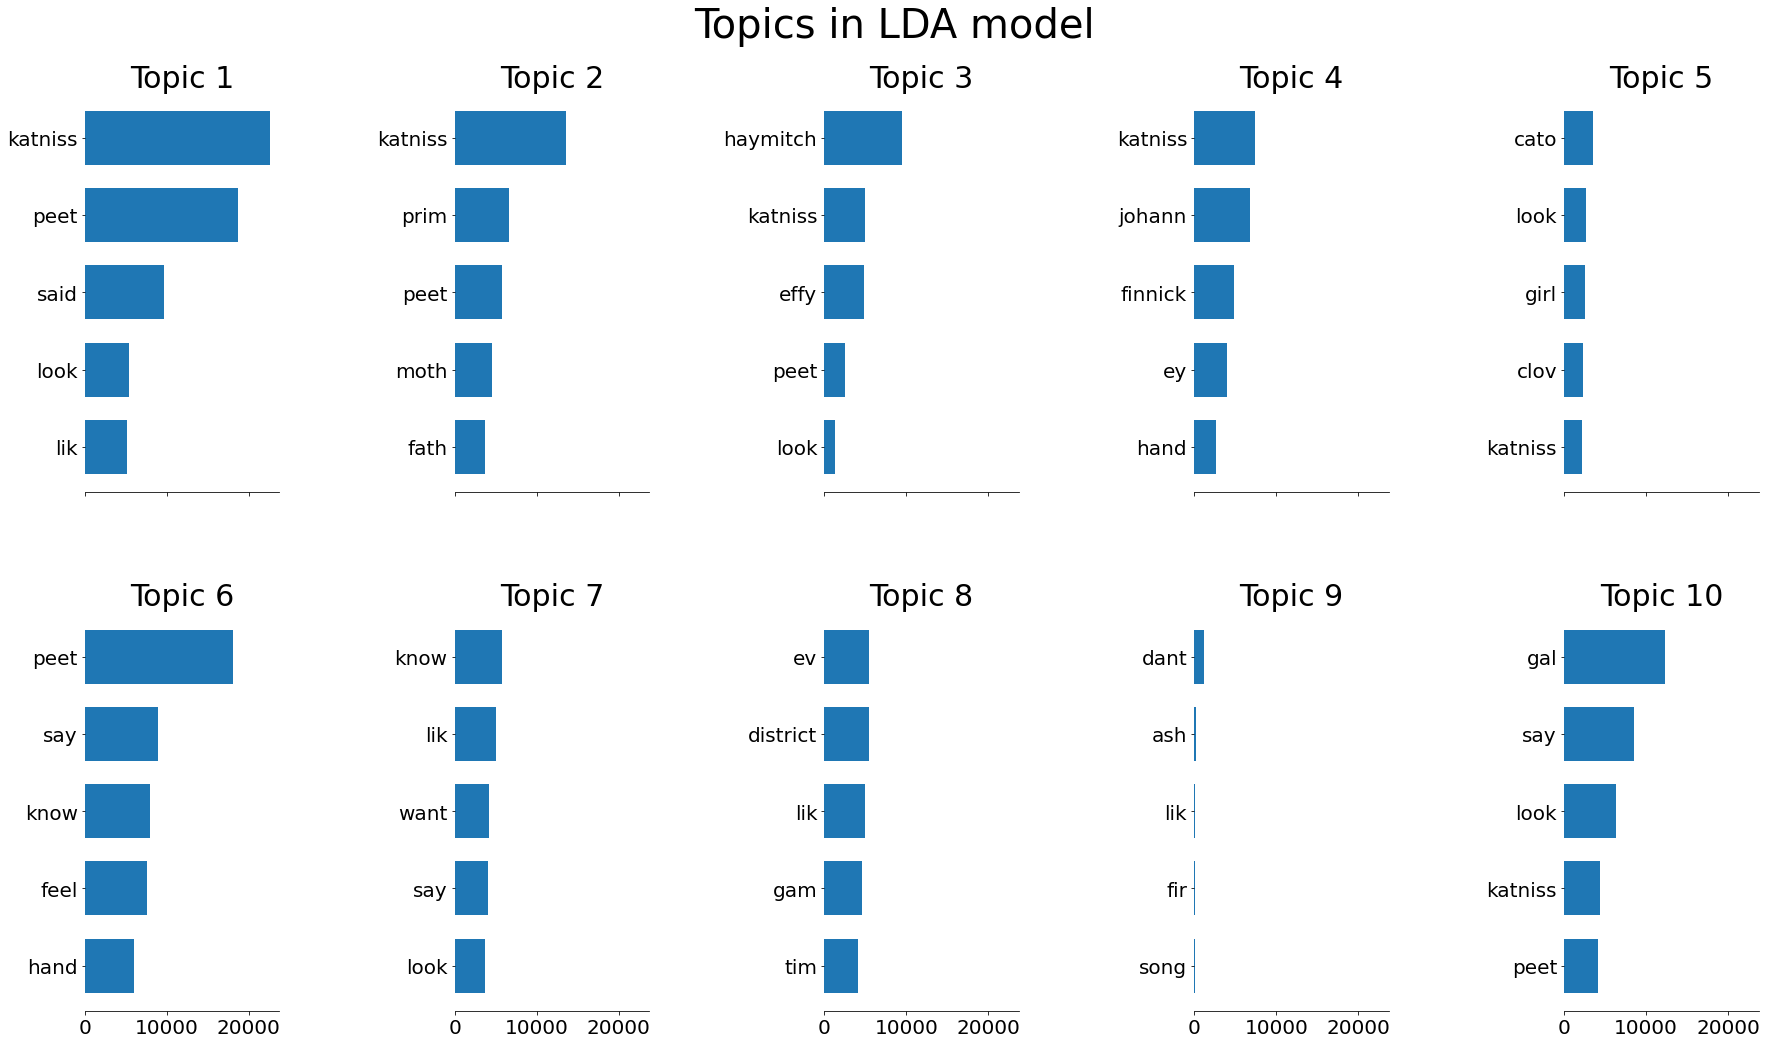

In [55]:
#LDA
vectorizer=CountVectorizer()
n_top_words = 5
tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

LDA modeling might have been more useful if I had done parts of speech tagging and then removed the verbs. Topics 6, 7, and 8 are verb-heavy. Topics 3, 4, and 5 have some secondary characters (Johanna, Finnick, Effie, Clove, Cato), and Topic 2 seems to deal with home life in District 12 (Katniss, Prim (Katniss's sister), Peeta, mother, father).

In [56]:
#LDA
display_topics(lda, tf_vectorizer.get_feature_names(), 10)


Topic  0
katniss, peet, said, look, lik, ey, hand, ev, tim, want

Topic  1
katniss, prim, peet, moth, fath, lov, ey, look, lik, year

Topic  2
haymitch, katniss, effy, peet, look, say, know, capitol, vict, think

Topic  3
katniss, johann, finnick, ey, hand, look, lik, anny, fac, head

Topic  4
cato, look, girl, clov, katniss, said, district, lik, year, gam

Topic  5
peet, say, know, feel, hand, ey, look, want, lov, lik

Topic  6
know, lik, want, say, look, tim, ev, real, tel, ask

Topic  7
ev, district, lik, gam, tim, know, capitol, ey, nev, real

Topic  8
dant, ash, lik, fir, song, burn, step, heart, noth, thought

Topic  9
gal, say, look, katniss, peet, madg, lik, ask, smil, know


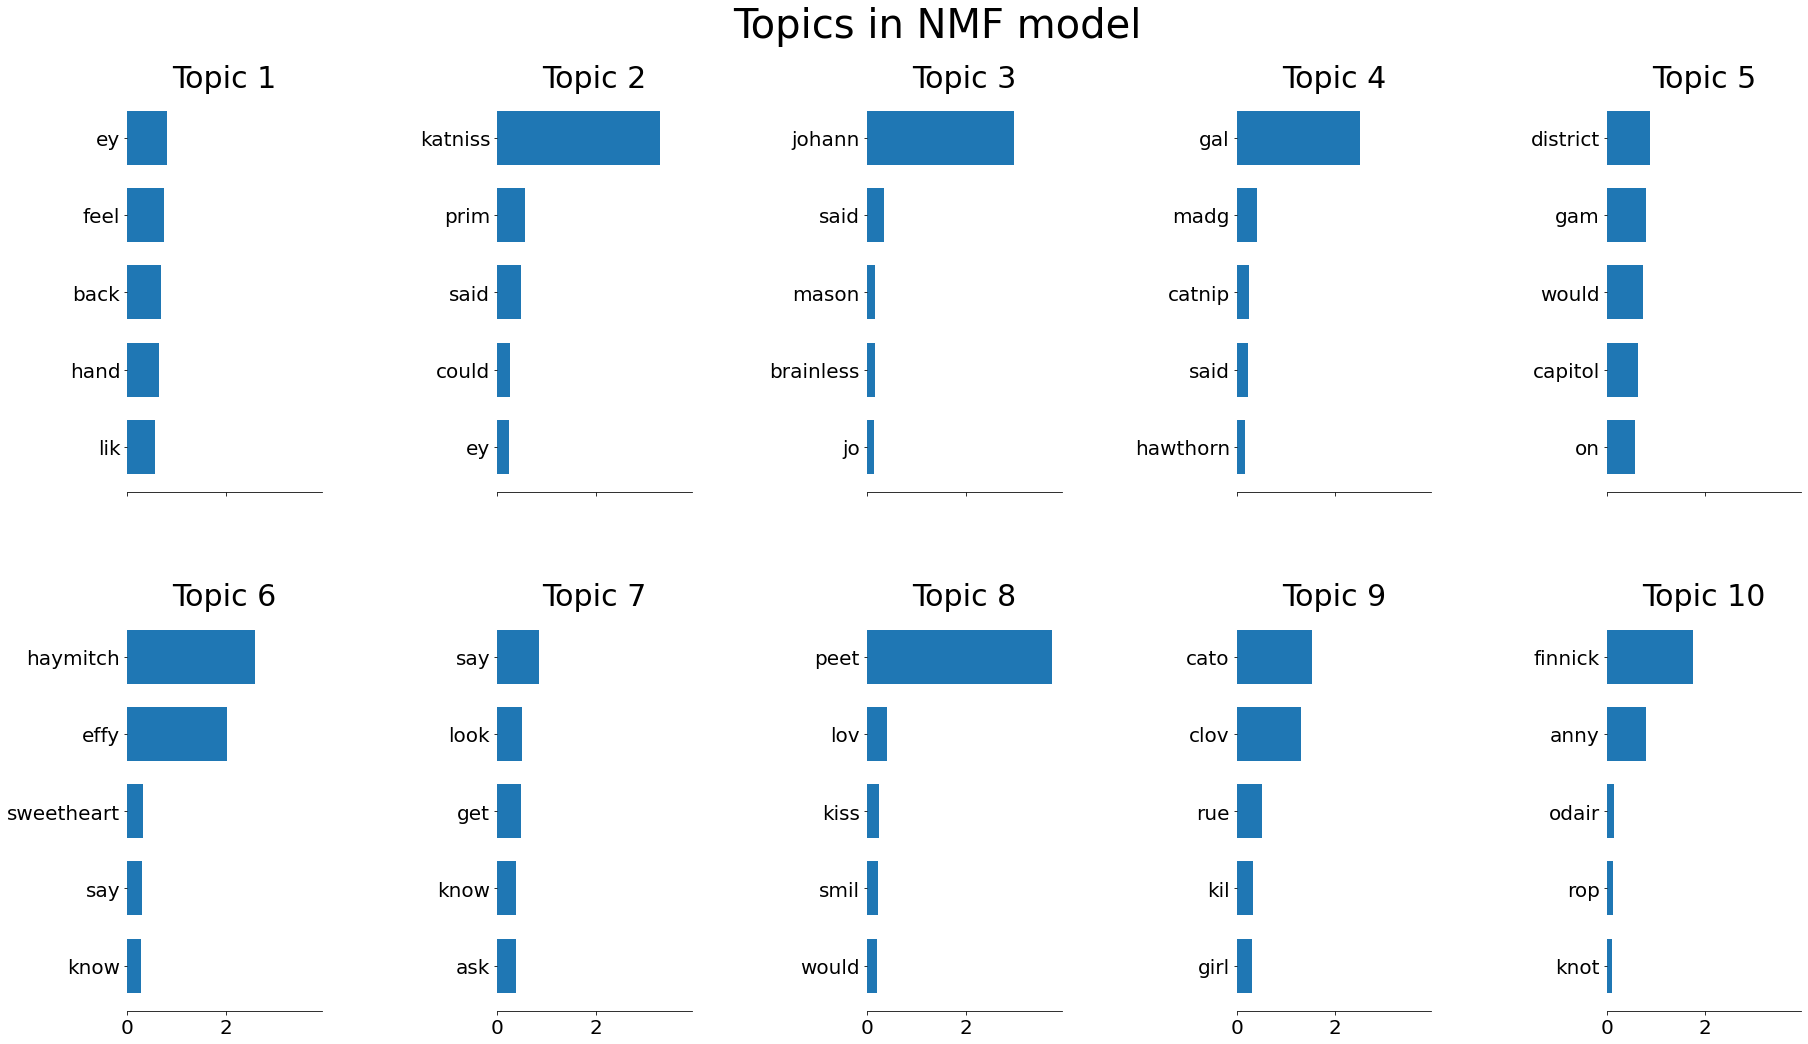

In [42]:
#NMF
n_top_words = 5
tf_feature_names = cv_tfidf.get_feature_names()
plot_top_words(nmf_model, tf_feature_names, n_top_words, 'Topics in NMF model')

NMF modeling resulted in only one or two main components per Topic, ususally a character. This type of modeling does not seem to be very useful for this type of text analysis.

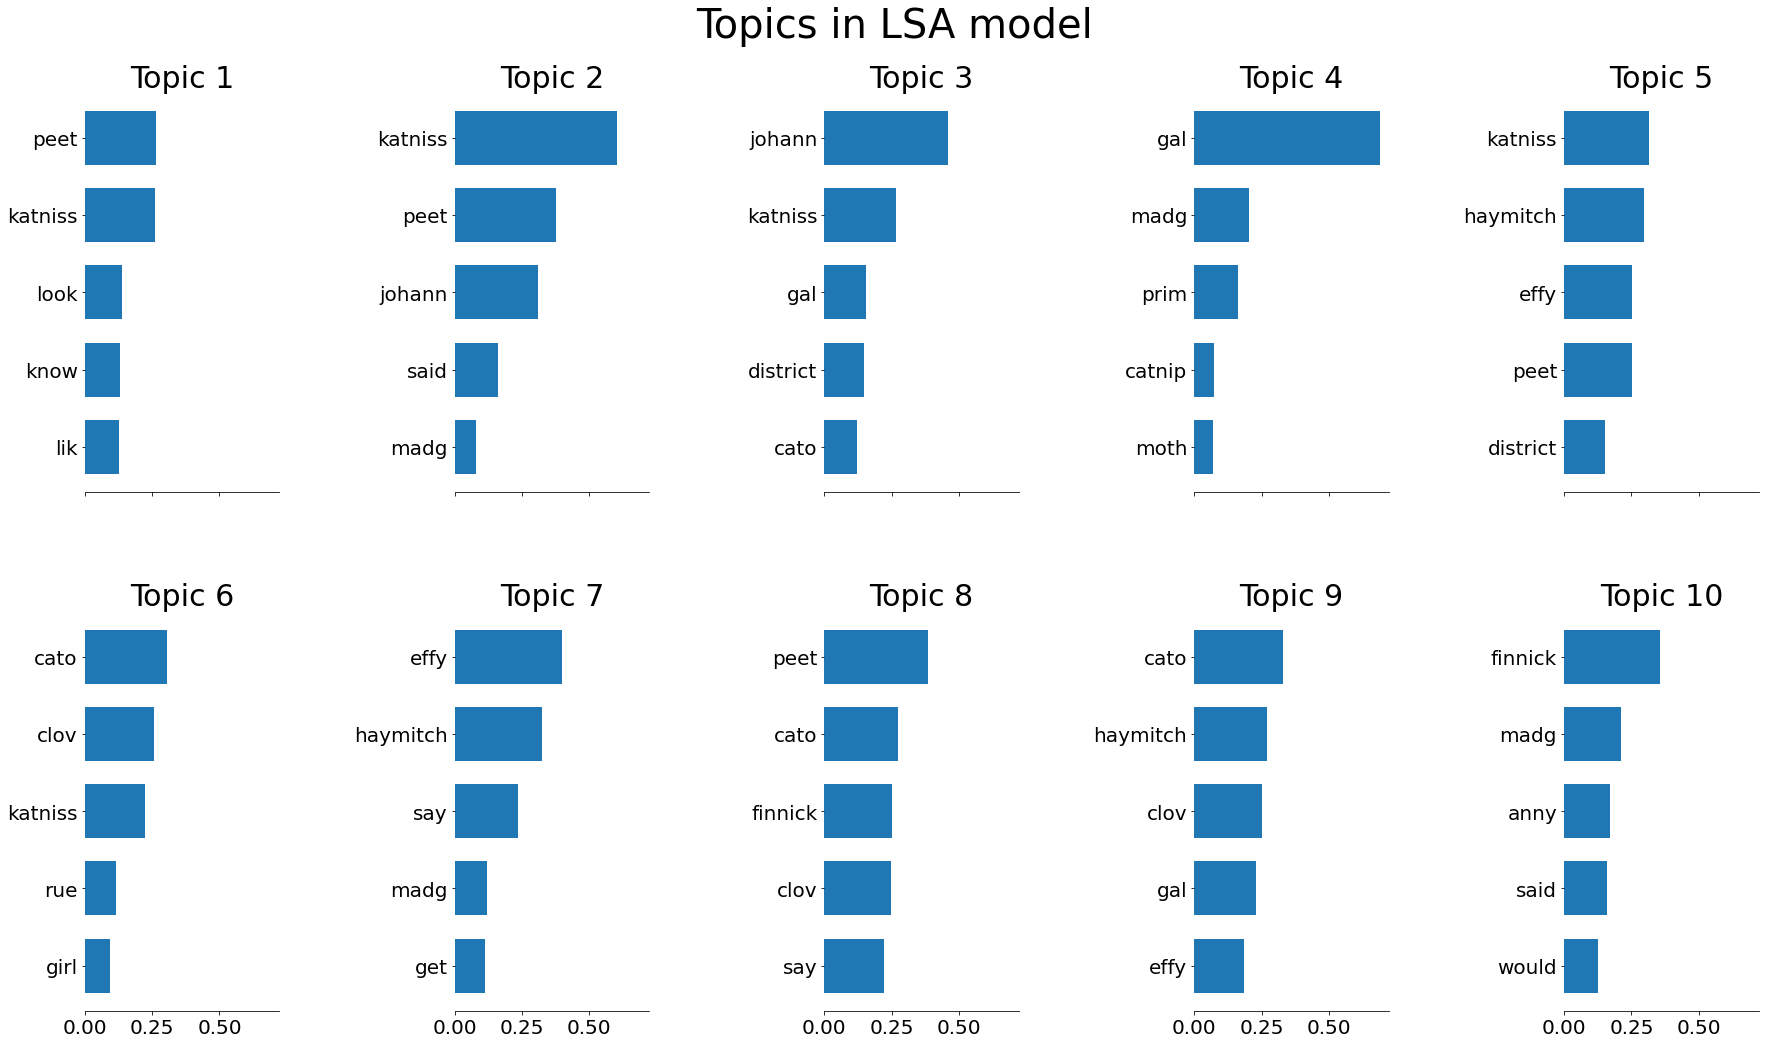

In [41]:
#LSA
n_top_words = 5
tf_feature_names = cv_tfidf.get_feature_names()
plot_top_words(lsa, tf_feature_names, n_top_words, 'Topics in LSA model')

LSA modeling is much more useful and informative. Several Topics (3, 4, 6, 7, 9, 10) have a secondary character as the most prominent component, and contain other secondary characters (Johanna, Gale, Madge, Prim, Cato, Clove, Effie, Haymitch, Finnick, and Annie), indicating that even in fan fiction stories that contain Katniss as a character, there are still Topics that are heavily comprised of secondary characters.